In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('adult.csv')

In [ ]:
data.shape

(32561, 15)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Remove duplicate rows based on all columns.

In [ ]:
data = data.drop_duplicates()
data.shape

(32537, 15)

Split Data Into Features & Target

In [ ]:
x = data[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
       ]]
y = data['income']

Split Data Into Train & Test Sets Using Sklearn train_test_split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
train_df = pd.concat([X_train,y_train],axis=1)

In [ ]:
train_df.shape

(26029, 15)

In [ ]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2494,58,Private,123436,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
2272,27,Private,128730,Assoc-voc,11,Never-married,Exec-managerial,Not-in-family,White,Male,10520,0,65,Greece,>50K
27159,23,Private,100345,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
15980,38,Private,374524,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
22924,25,Private,305472,Assoc-acdm,12,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,48,United-States,<=50K


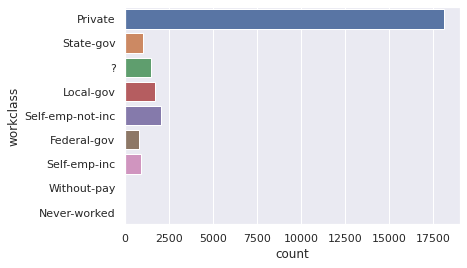

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="workclass", data=train_df)

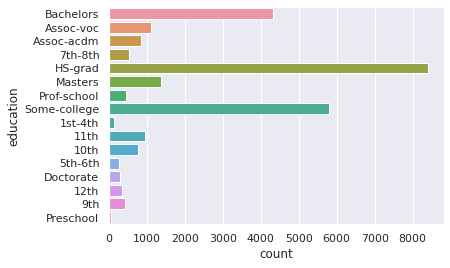

In [ ]:
ax = sns.countplot(y="education", data=train_df)

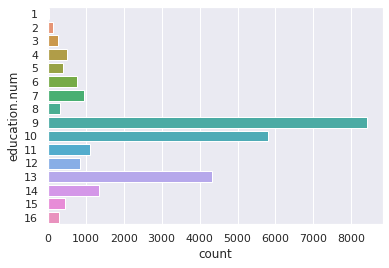

In [ ]:
ax = sns.countplot(y="education.num", data=train_df)

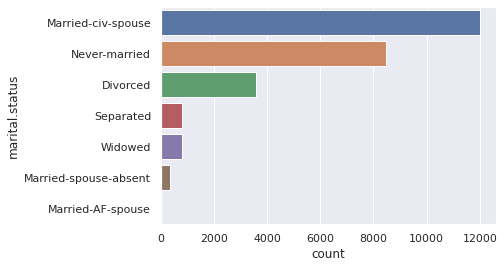

In [ ]:
ax = sns.countplot(y="marital.status", data=train_df)

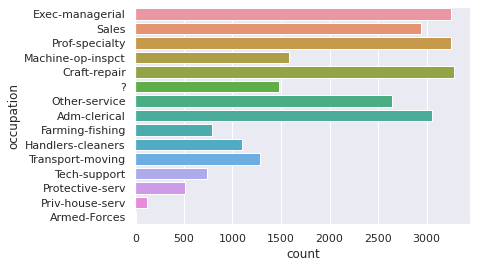

In [ ]:
ax = sns.countplot(y="occupation", data=train_df)

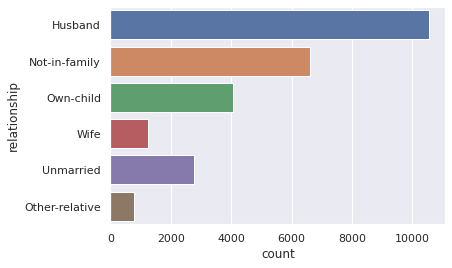

In [ ]:
ax = sns.countplot(y="relationship", data=train_df)

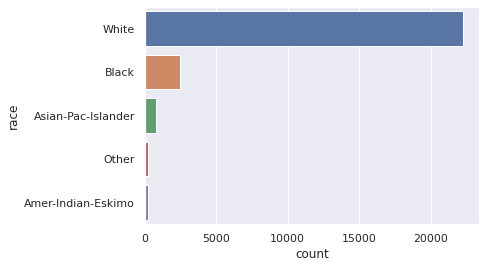

In [ ]:
ax = sns.countplot(y="race", data=train_df)

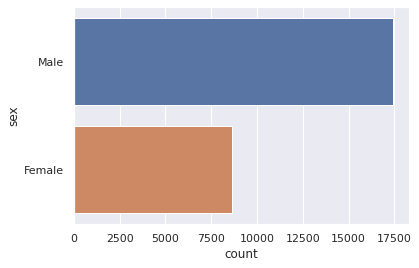

In [ ]:
ax = sns.countplot(y="sex", data=train_df)

In [ ]:
train_df["native.country"].value_counts()

United-States                 23376
Mexico                          518
?                               454
Philippines                     151
Germany                         109
Puerto-Rico                      93
Canada                           92
El-Salvador                      79
India                            79
Cuba                             77
England                          76
Jamaica                          63
Italy                            60
South                            59
China                            59
Dominican-Republic               56
Vietnam                          52
Guatemala                        47
Japan                            44
Poland                           41
Taiwan                           40
Columbia                         39
Haiti                            33
Iran                             31
Nicaragua                        29
Peru                             29
Portugal                         25
France                      

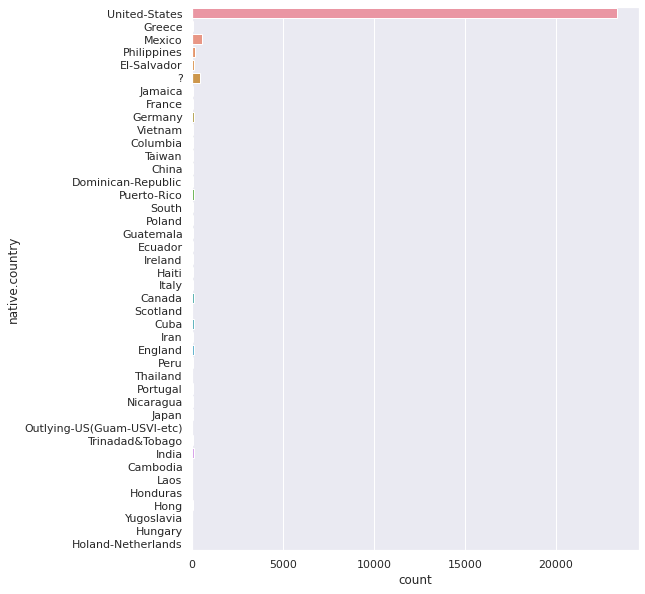

In [ ]:
plt.figure(figsize=(8,10))
ax = sns.countplot(y="native.country", data=train_df)

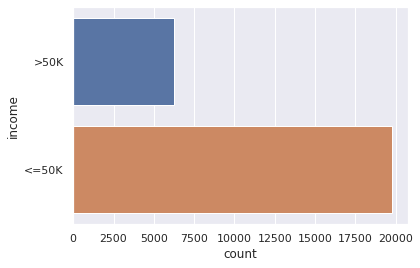

In [ ]:
ax = sns.countplot(y="income", data=train_df)

In [ ]:
train_df['income_cat'] = np.where(train_df['income']=='<=50K',0,1)

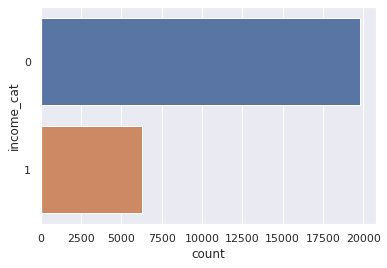

In [ ]:
ax = sns.countplot(y="income_cat", data=train_df)

In [ ]:
train_df['income_cat'].value_counts(normalize=True)

0    0.75973
1    0.24027
Name: income_cat, dtype: float64

In [ ]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'income_cat'],
      dtype='object')

In [ ]:
train_df = pd.get_dummies(train_df, columns=['workclass','education','marital.status', 'occupation'
, 'relationship', 'race', 'sex','native.country'], drop_first=True)

In [ ]:
train_df.shape

(26029, 102)

In [ ]:
train_df = train_df.drop(columns=['income'])

In [ ]:
train_df.shape

(26029, 101)

In [ ]:
sum(train_df.isnull().sum())

0

Histograms for all numerical columns in the data DataFrame using Pandas Hist:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70adee9cd0>,
      dtype=object)

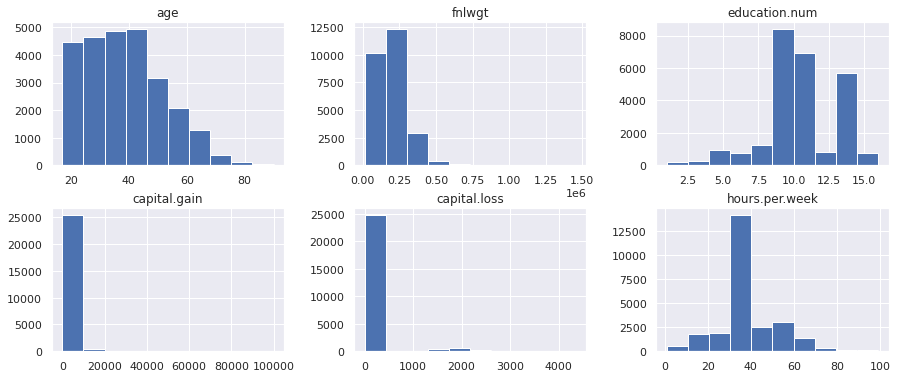

In [ ]:
train_df[['age', 'fnlwgt',  'education.num', 
       'capital.gain', 'capital.loss', 'hours.per.week']].hist(figsize=(15,30),layout=(9,3))

Box Plot

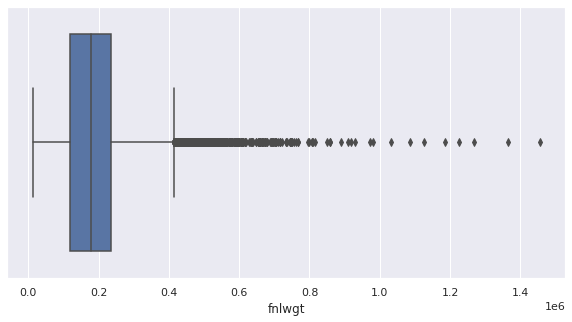

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['fnlwgt'])
plt.show()

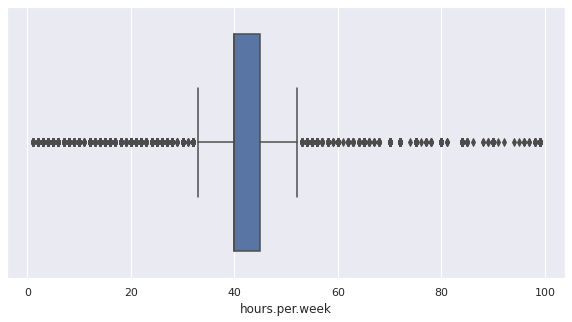

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['hours.per.week'])
plt.show()

Correlation Heatmap

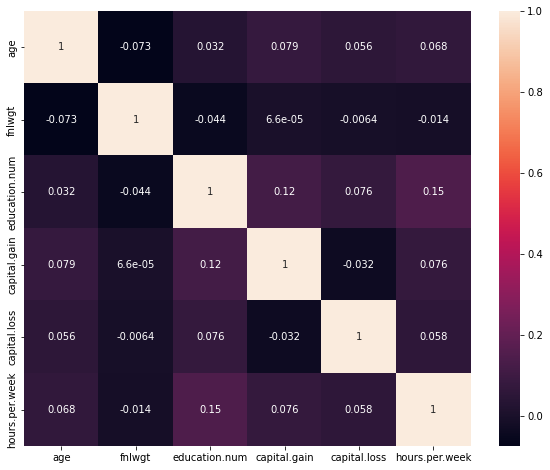

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True)

Drop fnlwgt, capital.gain,education.num,hours.per.week columns

In [ ]:
train_df = train_df.drop(columns=['fnlwgt','capital.gain','education.num','hours.per.week'])

In [ ]:
train_df.shape

(26029, 97)

Logistic Regression Model

In [ ]:
features = list(train_df.columns)
features.remove('income_cat')

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(train_df[features], train_df['income_cat'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Measuring Model Performance

In [ ]:
test_df = pd.concat([X_test,y_test],axis=1)

In [ ]:
test_df.shape

(6508, 15)

In [ ]:
test_df = test_df.drop(columns=['fnlwgt','capital.gain','education.num','hours.per.week'])
test_df['income_cat'] = np.where(test_df['income']=='<=50K',0,1)
test_df = test_df.drop(columns=['income'])
test_df = pd.get_dummies(test_df, columns=['workclass','education','marital.status', 'occupation'
, 'relationship', 'race', 'sex','native.country'], drop_first=True)
print(test_df.shape)

(6508, 95)


In [ ]:
test_df['occupation_Armed-Forces'] = 0
test_df['native.country_Holand-Netherlands'] = 0

In [ ]:
score = logisticRegr.score(test_df[features], test_df['income_cat'])
print(score)

0.8300553165334973


In [ ]:
from sklearn import metrics

In [ ]:
test_predictions = logisticRegr.predict(test_df[features])

In [ ]:
cm = metrics.confusion_matrix(test_df['income_cat'], test_predictions)
print(cm)

[[4529  394]
 [ 712  873]]
